# Disease Prediction based on Symtoms

In [1]:
#Importing Libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import os

In [2]:
symptoms=['back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
    'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
    'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
    'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool',
    'irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
    'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips',
    'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints',
    'movement_stiffness','spinning_movements','loss_of_balance','unsteadiness',
    'weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
    'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
    'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum',
    'rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
    'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen',
    'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf',
    'palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose',
    'yellow_crust_ooze']

In [3]:
len(symptoms)

95

In [3]:
drugSolution = {'Fungal infection': 'fluconazole','Allergy' : 'Antihistamines','GERD': 'omeprazole',
'Chronic cholestasis': 'Ursodeoxycholic Acid','Drug Reaction': 'Diphenhydramine (Benadryl)',
    'Peptic ulcer diseae':'Proton pump inhibitors (PPIs)','AIDS':'dronabinol','Diabetes':'hydrochlorothiazide',
    'Gastroenteritis':'erythromycin','Bronchial Asthma' : 'prednisolone','Hypertension':'lisinopril',
    ' Migraine':'Sumatriptan','Cervical spondylosis':'ibuprofen','Paralysis (brain hemorrhage)' : 'Cyklokapron',
    'Jaundice':'Phenobarbital','Malaria': 'Mefloquine','Chicken pox' : 'Valacyclovir ','Dengue':'Acetaminophen',
    'Typhoid':'Ciprofloxacin','hepatitis A':'Immune Globulin Intramuscular',
    'Hepatitis B':'Entecavir','Hepatitis C':'Ribavirin','Hepatitis D':'Pegylated interferon alpha','Hepatitis E':'Ribavirin',
    'Alcoholic hepatitis':' Corticosteroids','Tuberculosis':'Prednisone',
    'Common Cold':'Diphenhydramine','Pneumonia':'Prednisone','Dimorphic hemmorhoids(piles)':'Hydrocortisone',
    'Heartattack':'Captopril','Varicoseveins':'Asclera (polidocanol) and sodium tetradecyl sulfate',
    'Hypothyroidism':'Levothyroxine','Hyperthyroidism':'Methimazole','Hypoglycemia':'Glucagon','Osteoarthristis':'Diclofenac',
    'Arthritis':'Methotrexate','(vertigo) Paroymsal  Positional Vertigo':'Antivert',
    'Acne':'Doxycycline','Urinary tract infection':'Ciprofloxacin','Psoriasis':'Clobetasol',
    'Impetigo':'Mupirocin'
}

disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

In [4]:
dr=[]
for i in range(0,len(symptoms)):
    dr.append(0)
print(dr)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
#Reading the training .csv file
df=pd.read_csv("C:/Users/raobk/Desktop/Workspace/Drug_Prescription_System/Dataset/training.csv")
DF= pd.read_csv('C:/Users/raobk/Desktop/Workspace/Drug_Prescription_System/Dataset/training.csv', index_col='prognosis')
#Replace the values in the imported file by pandas by the inbuilt function replace in pandas.

df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
#df.head()
DF.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fungal infection,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X= df[symptoms]
y = df[["prognosis"]]
np.ravel(y)
print(X)

      back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  \
0             0             0               0          0           0   
1             0             0               0          0           0   
2             0             0               0          0           0   
3             0             0               0          0           0   
4             0             0               0          0           0   
...         ...           ...             ...        ...         ...   
4915          0             0               0          0           0   
4916          0             0               0          0           0   
4917          0             0               0          0           0   
4918          0             0               0          0           0   
4919          0             0               0          0           0   

      yellow_urine  yellowing_of_eyes  acute_liver_failure  fluid_overload  \
0                0                  0                    

In [7]:
print(y)

      prognosis
0             0
1             0
2             0
3             0
4             0
...         ...
4915         36
4916         37
4917         38
4918         39
4919         40

[4920 rows x 1 columns]


In [8]:
#Reading the  testing.csv file
testing=pd.read_csv("C:/Users/raobk/Desktop/Workspace/Drug_Prescription_System/Dataset/testing.csv")

#Using inbuilt function replace in pandas for replacing the values

testing.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
testing.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4


In [9]:
X_test= testing[symptoms]
y_test = testing[["prognosis"]]
np.ravel(y_test)
print(X_test)

    back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  \
0           0             0               0          0           0   
1           0             0               0          0           0   
2           0             0               0          0           0   
3           0             0               1          0           0   
4           0             0               0          0           0   
5           0             0               1          0           0   
6           0             0               0          0           0   
7           0             0               0          0           0   
8           0             0               0          1           0   
9           0             0               0          0           0   
10          0             0               0          0           0   
11          0             0               0          0           0   
12          1             0               0          0           0   
13          0       

In [10]:
print(y_test)

    prognosis
0           0
1           1
2           2
3           3
4           4
5           5
6           6
7           7
8           8
9           9
10         10
11         11
12         12
13         13
14         14
15         15
16         16
17         17
18         18
19         19
20         20
21         21
22         22
23         23
24         24
25         25
26         26
27         27
28         28
29         29
30         30
31         31
32         32
33         33
34         34
35         35
36         36
37         37
38         38
39         39
40         40


**To build the precision of the model, we utilized three distinctive algorithms which are as per the following**
* Decision Tree algorithm
* Random Forest algorithm
* KNearestNeighbour algorithm
* Naive Bayes algorithm

# Decision Tree Algorithm

In [11]:
import pickle        
from sklearn import tree
clf3 = tree.DecisionTreeClassifier() 
clf3 = clf3.fit(X,y)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=clf3.predict(X_test)
print("Decision Tree")
print("Accuracy")
dtc_acc=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
pickle.dump(clf3,open('dtc_model.sav','wb'))

Decision Tree
Accuracy
0.9512195121951219
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [12]:
import seaborn as sns
title = 'Confusion Matrix for Decision Tree Classifier\n'
fig, ax = plt.subplots(figsize=(15, 10))
plt.title(title, loc='left', fontsize=30)
sns.heatmap(conf_matrix, fmt="",annot=True,linewidths=2,square=True)
plt.ylabel("Actual")
plt.xlabel("Predicted")

Text(0.5, 80.7222222222222, 'Predicted')

# Random Forest Algorithm

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators=100)
clf4 = clf4.fit(X,np.ravel(y))

# calculating accuracy 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=clf4.predict(X_test)
print("Random Forest")
print("Accuracy")
rf_acc=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
pickle.dump(clf4,open('RandomForest_model.sav','wb'))

Random Forest
Accuracy
0.9512195121951219
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [14]:
title = 'Confusion Matrix for Random Forest\n'
fig, ax = plt.subplots(figsize=(15, 10))
plt.title(title, loc='left', fontsize=30)
sns.heatmap(conf_matrix, fmt="",annot=True,linewidths=2,square=True)
plt.ylabel("Actual")
plt.xlabel("Predicted")

Text(0.5, 80.7222222222222, 'Predicted')

# KNearestNeighbour Algorithm

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn=knn.fit(X,np.ravel(y))
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=knn.predict(X_test)
print("kNearest Neighbour")
print("Accuracy")
knn_acc=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
pickle.dump(knn,open('knn_model.sav','wb'))

kNearest Neighbour
Accuracy
0.9512195121951219
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [16]:
title = 'Confusion Matrix for kNeatrest Neighbour\n'
fig, ax = plt.subplots(figsize=(15, 10))
plt.title(title, loc='left', fontsize=30)
sns.heatmap(conf_matrix, fmt="",annot=True,linewidths=2,square=True)
plt.ylabel("Actual")
plt.xlabel("Predicted")

Text(0.5, 80.7222222222222, 'Predicted')

# Naive Bayes Algorithm

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb=gnb.fit(X,np.ravel(y))
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=gnb.predict(X_test)
pickle.dump(gnb,open('GNB_model.sav','wb'))
print("Naive Bayes")
print("Accuracy")
naive_acc=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

Naive Bayes
Accuracy
0.9512195121951219
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [18]:
title = 'Confusion Matrix for Naive Bayes\n'
fig, ax = plt.subplots(figsize=(15, 10))
plt.title(title, loc='left', fontsize=30)
sns.heatmap(conf_matrix, fmt="",annot=True,linewidths=2,square=True)
plt.ylabel("Actual")
plt.xlabel("Predicted")

Text(0.5, 80.7222222222222, 'Predicted')

#### Overall Performance of all the Models

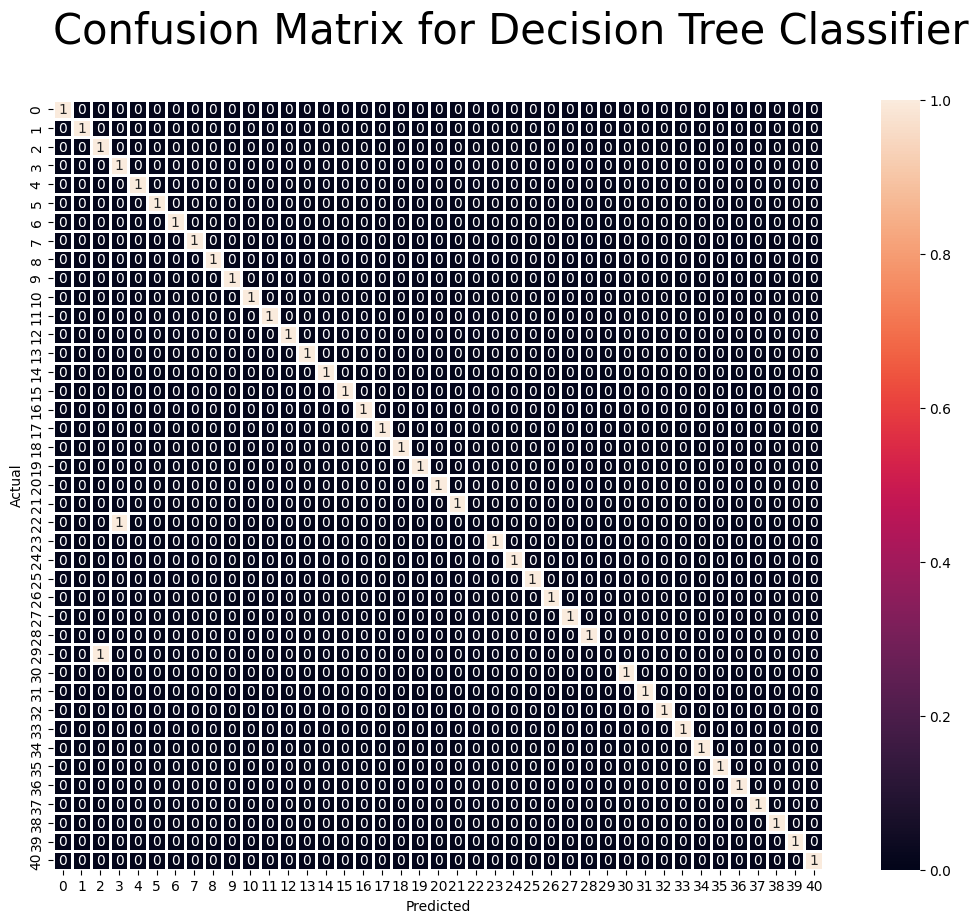

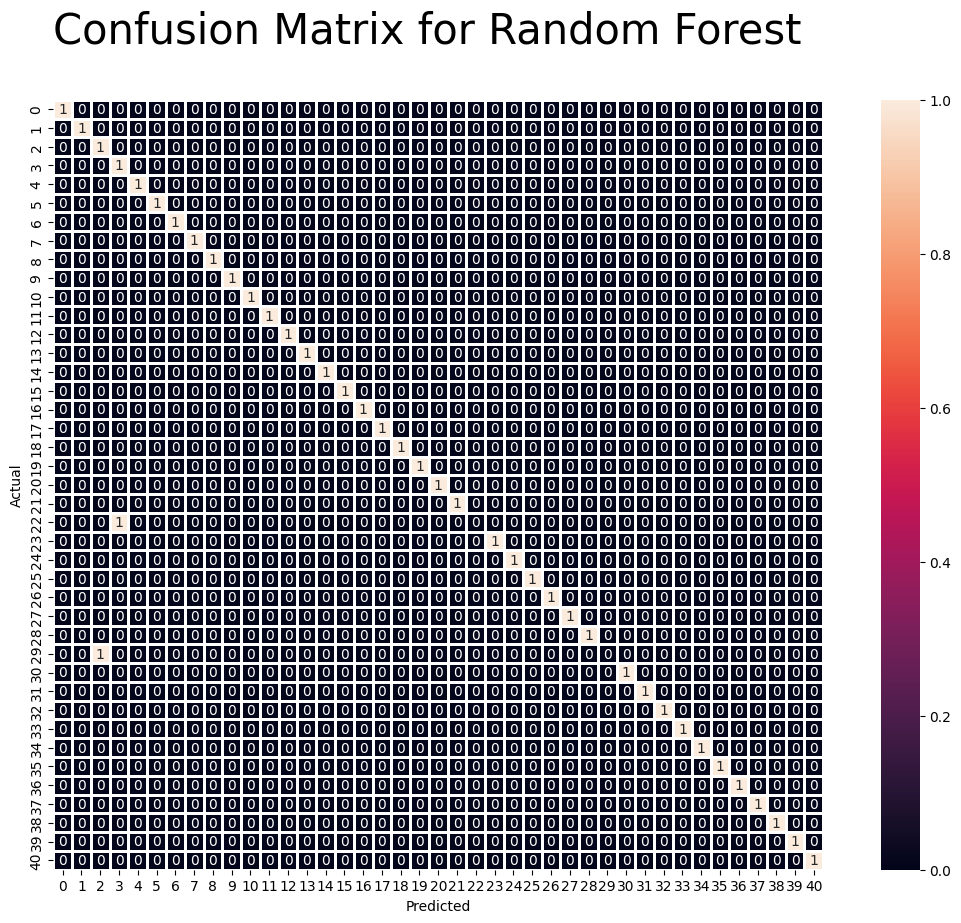

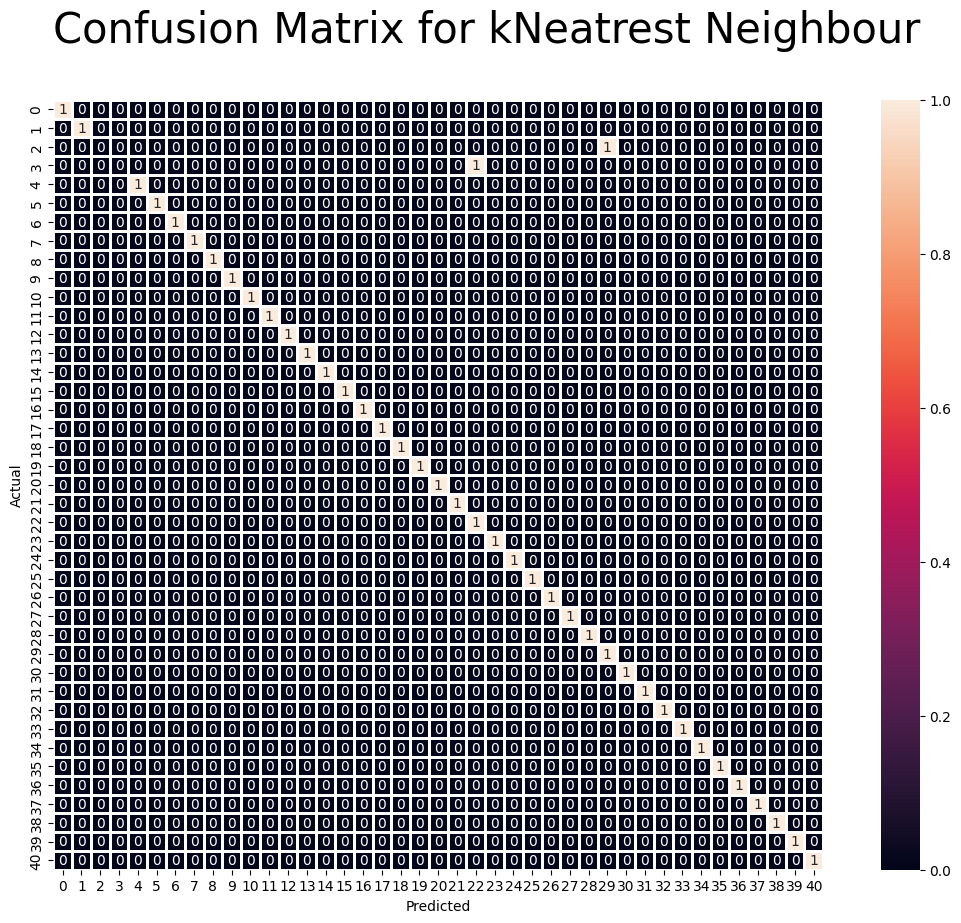

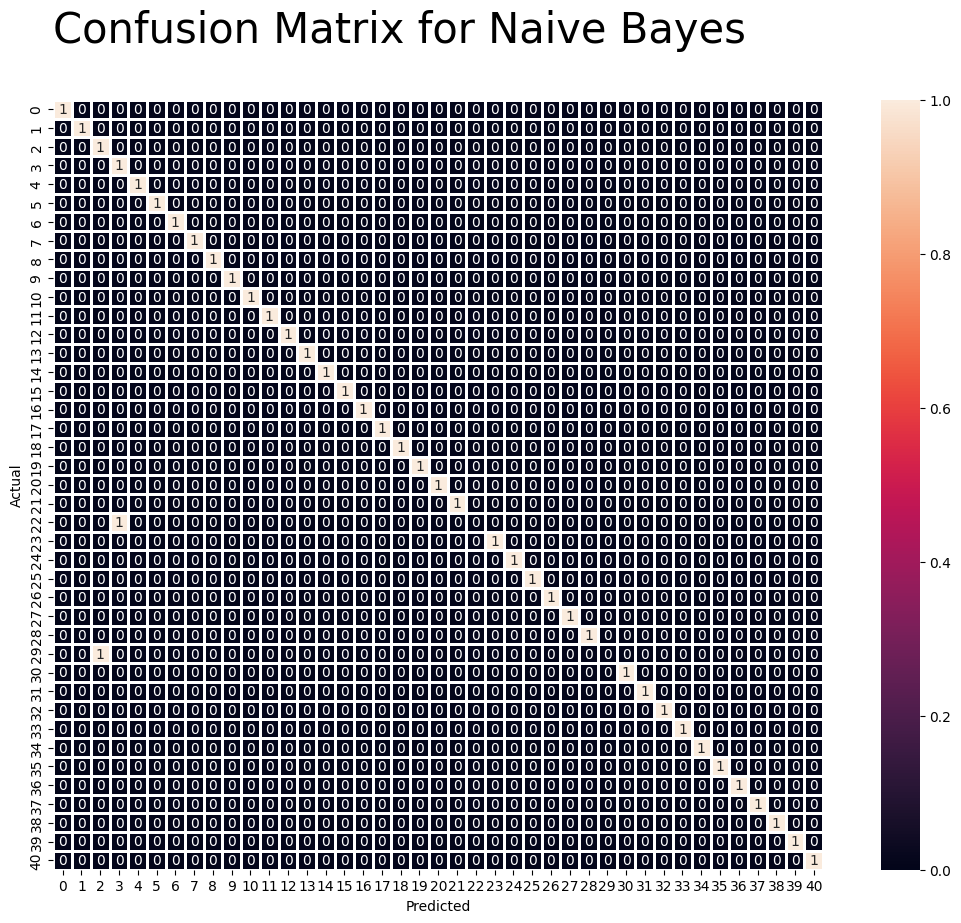

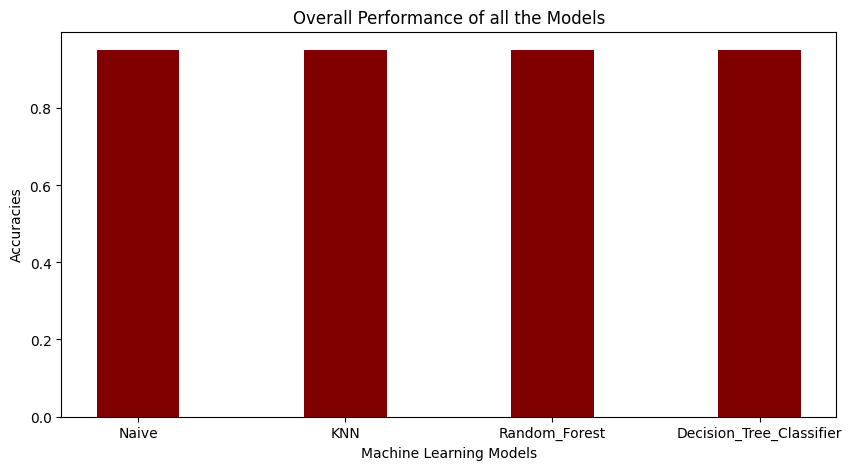

In [19]:
import numpy as np
import matplotlib.pyplot as plt
 
models = ["Naive","KNN","Random_Forest","Decision_Tree_Classifier"]
values = [naive_acc,knn_acc,rf_acc,dtc_acc]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracies")
plt.title("Overall Performance of all the Models")
plt.show()


### Prediction

In [20]:
from numpy import array
symptomslist = ['belly_pain','constipation','abdominal_pain','diarrhoea','mild_fever']
        
for k in range(0,len(symptoms)):
    for z in symptomslist:
        if(z==symptoms[k]):
            dr[k]=1


predict_dtc = clf3.predict([dr])
predict_gnb = gnb.predict([dr])
predict_knn = knn.predict([dr])
predict_rf  = clf4.predict([dr])
diseases_models=[predict_dtc[0],predict_gnb[0] ,predict_knn[0] ,predict_rf[0] ]
highest_occur = {i:diseases_models.count(i) for i in diseases_models}
disease_estimator=max(highest_occur,key=highest_occur.get)
drugName=drugSolution[disease[disease_estimator]]
print("The patient is suffering from "+disease[disease_estimator]+" disease.")
print("The Prescribed Drug is "+drugName+".")

The patient is suffering from Typhoid disease.
The Prescribed Drug is Ciprofloxacin.


d:\Miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\Miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
